## Manual Time Series Implementation

In [227]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
#load dataset from cleaning notebook
df = pd.read_csv("household_power_cleaned.csv.zip", parse_dates=["Datetime"], index_col="Datetime")

#target variable
power_df = df["Global_active_power"].copy()
power_df.head()

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [230]:
#option1: hourly average power
hourly = power_df.resample("H").mean()
#option2: daily average power
daily = power_df.resample("D").mean()
#option3: weekly average power
weekly = power_df.resample("W").mean()
#option4: monthly average power
monthly = power_df.resample("M").mean()


print("Original length:", len(power_df))
print("Hourly length:", len(hourly))
print("Daily length:", len(daily))
print("Weekly length:", len(weekly))
print("Monthly length:", len(monthly))

#choose metric to model
tsh = hourly.dropna()
tsd = daily.dropna()
tsw = weekly.dropna()
tsm = monthly.dropna()
print(tsh.head())
print(tsd.head())
print(tsw.head())
print(tsm.head())

Original length: 2049280
Hourly length: 34589
Daily length: 1442
Weekly length: 207
Monthly length: 48
Datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Name: Global_active_power, dtype: float64
Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Name: Global_active_power, dtype: float64
Datetime
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
Freq: W-SUN, Name: Global_active_power, dtype: float64
Datetime
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
Freq: M, Name: Global_active_power, dtype: float64


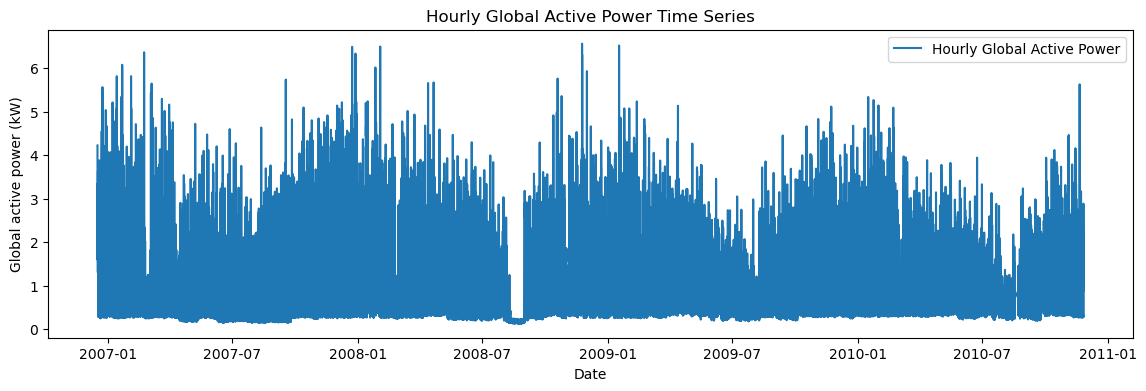

In [231]:
#initial hourly plot
plt.figure(figsize=(14, 4))
plt.plot(tsh, label="Hourly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Hourly Global Active Power Time Series")
plt.legend()
plt.show()

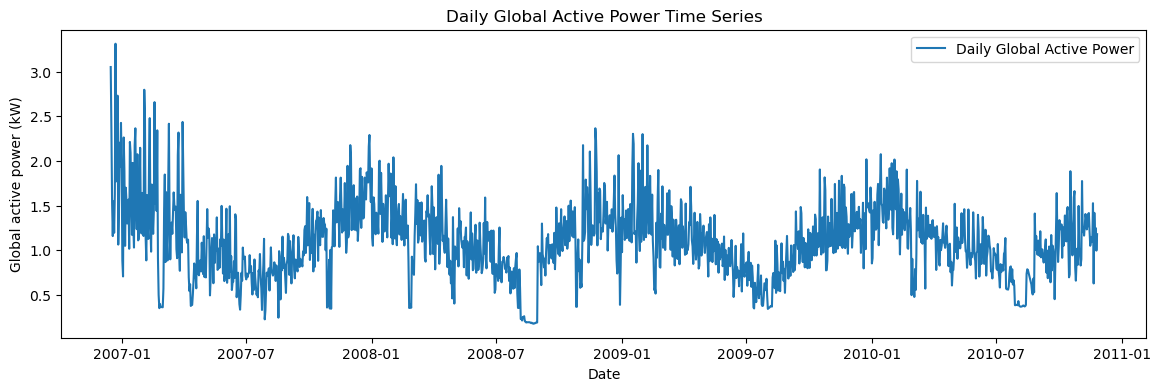

In [232]:
#initial daily plot
plt.figure(figsize=(14, 4))
plt.plot(tsd, label="Daily Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Daily Global Active Power Time Series")
plt.legend()
plt.show()

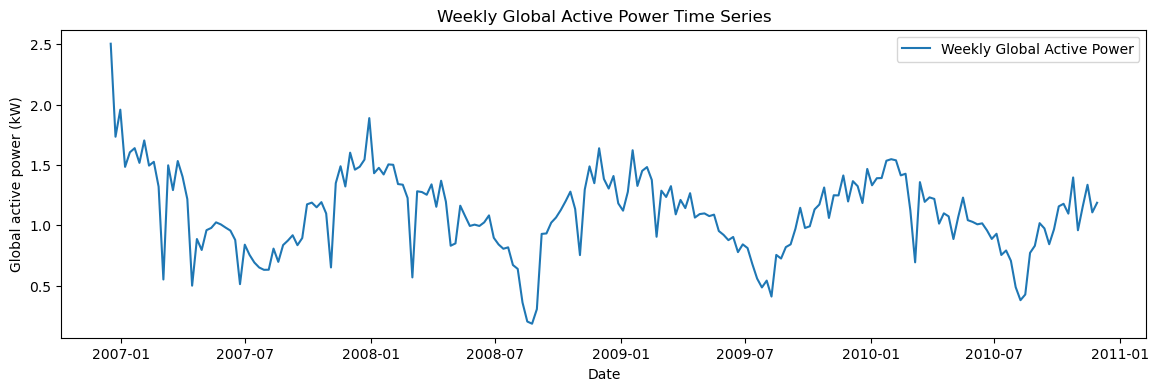

In [233]:
#initial weekly plot
plt.figure(figsize=(14, 4))
plt.plot(tsw, label="Weekly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Weekly Global Active Power Time Series")
plt.legend()
plt.show()

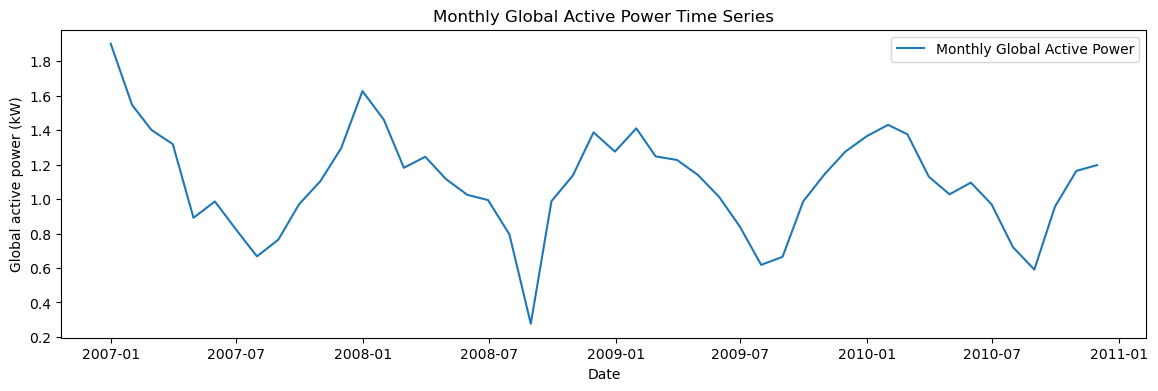

In [234]:
#initial monthly plot
plt.figure(figsize=(14, 4))
plt.plot(tsm, label="Monthly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Monthly Global Active Power Time Series")
plt.legend()
plt.show()

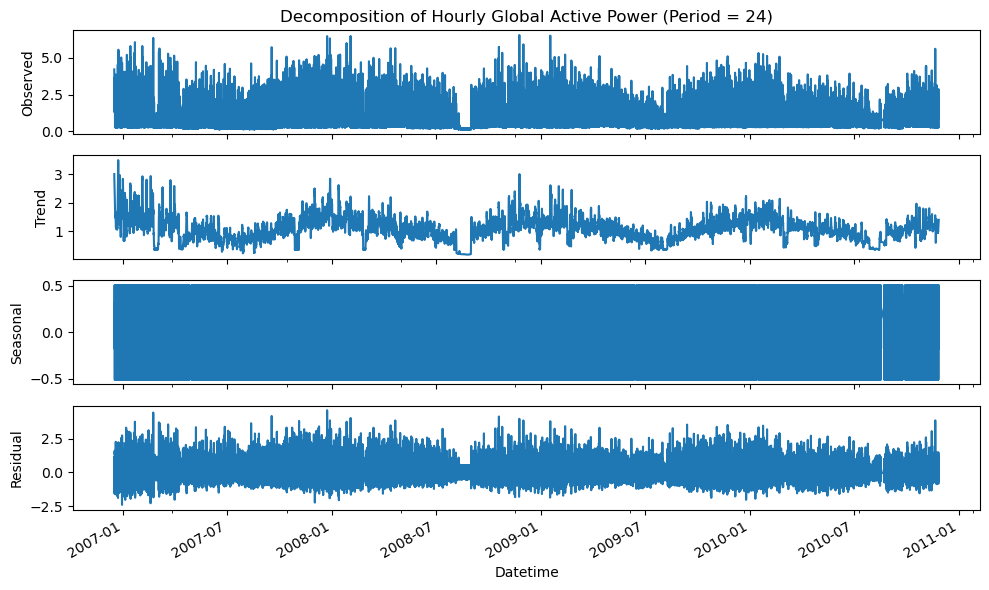

In [235]:
from statsmodels.tsa.seasonal import seasonal_decompose
#hourly compostion
#24 period for daily pattern
decomp_h = seasonal_decompose(tsh, period=24, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Hourly Global Active Power (Period = 24)')
decomp_h.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_h.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_h.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_h.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

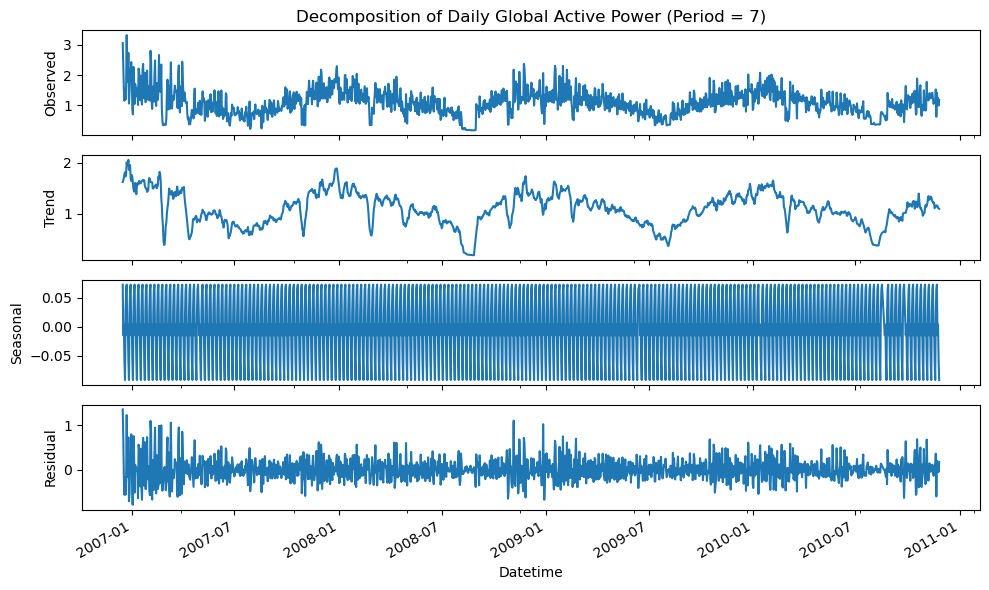

In [236]:
#daily compostion
#7 period for weekly pattern
decomp_d = seasonal_decompose(tsd, period=7, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Daily Global Active Power (Period = 7)')
decomp_d.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_d.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_d.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_d.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

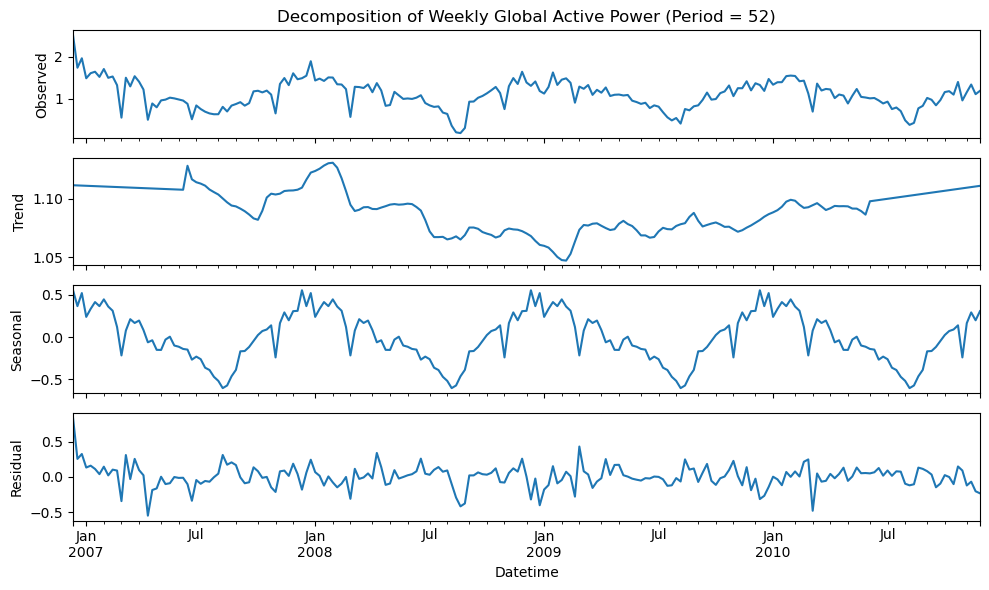

In [238]:
#weekly compostition
#52 weeks for yearly patterns
decomp_w = seasonal_decompose(tsw, period=52, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Weekly Global Active Power (Period = 52)')
decomp_w.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_w.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_w.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_w.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

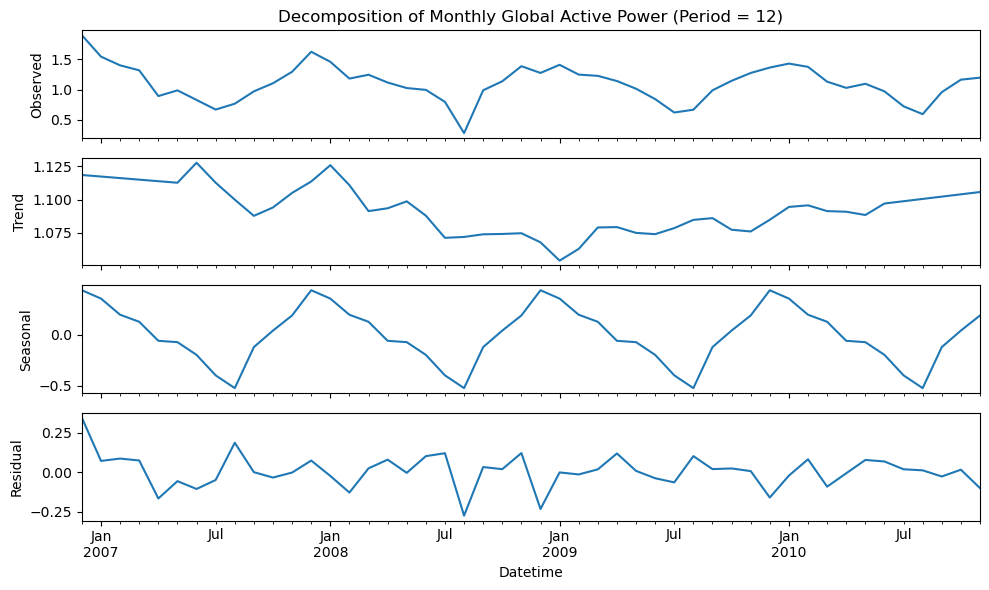

In [240]:
#montlhy composition
#12 periods for yearly
decomp_m = seasonal_decompose(tsm, period=12, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))
ax[0].set_title('Decomposition of Monthly Global Active Power (Period = 12)')
decomp_m.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_m.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_m.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_m.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

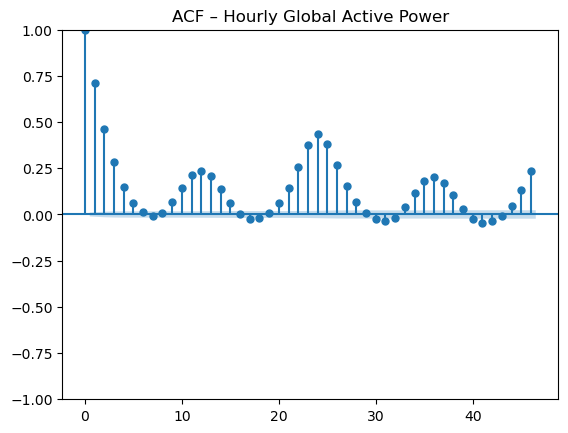

<Figure size 1000x400 with 0 Axes>

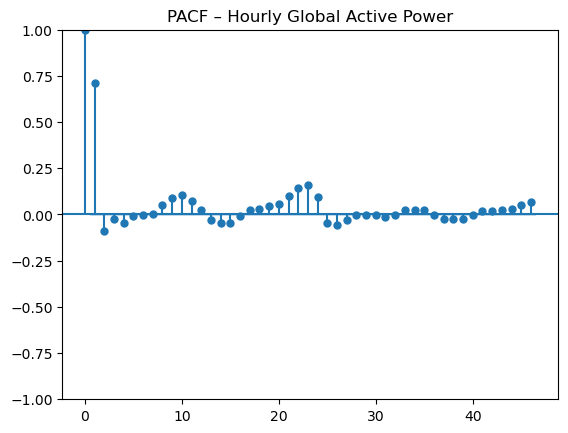

In [243]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#hourly plots to determine lag
series_for_lags_h = tsh

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_h, title="ACF – Hourly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_h, title="PACF – Hourly Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

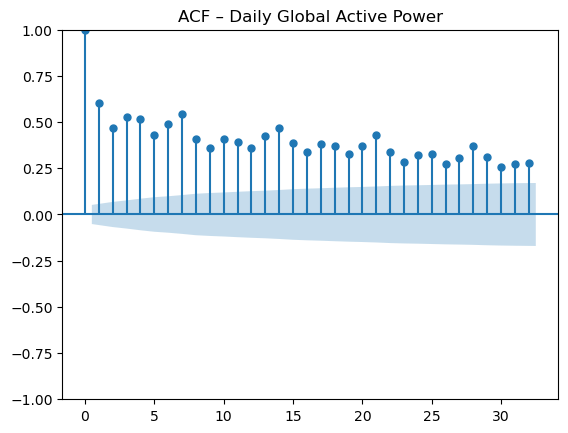

<Figure size 1000x400 with 0 Axes>

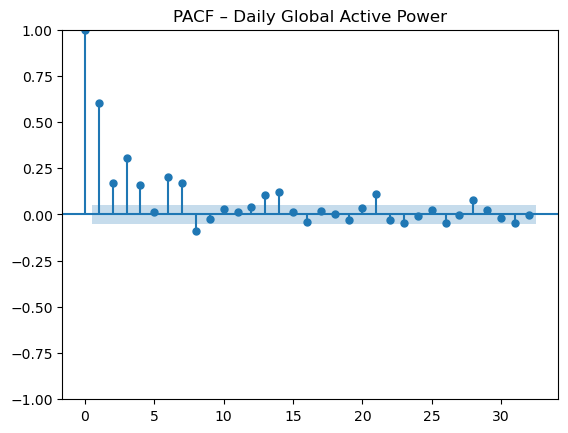

In [246]:
#daily
series_for_lags_d = tsd

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_d, title="ACF – Daily Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_d, title="PACF – Daily Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

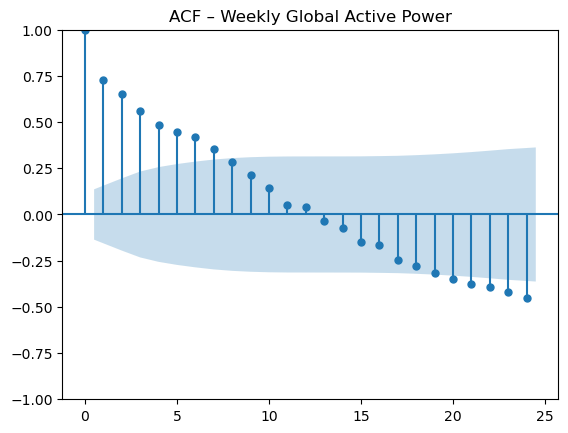

<Figure size 1000x400 with 0 Axes>

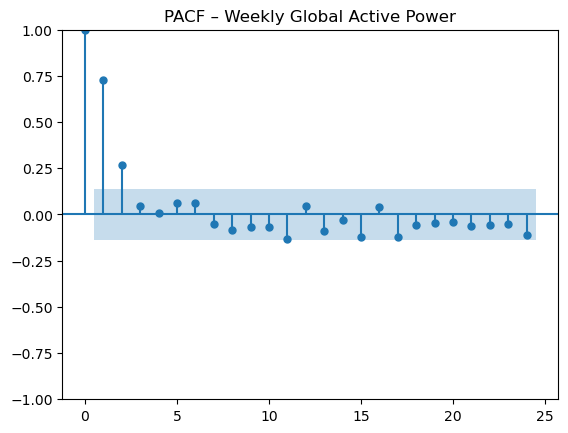

In [247]:
#weekly
series_for_lags_w = tsw

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_w, title="ACF – Weekly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_w, title="PACF – Weekly Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

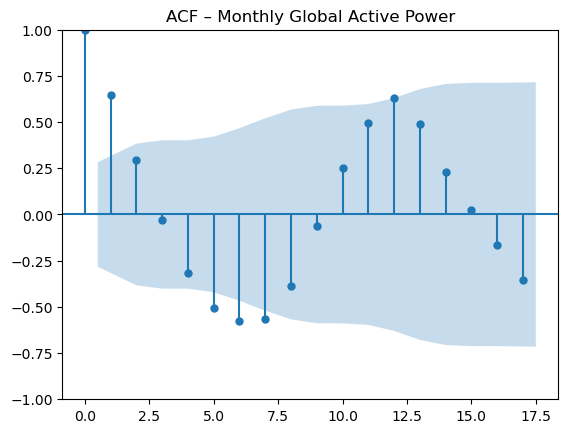

<Figure size 1000x400 with 0 Axes>

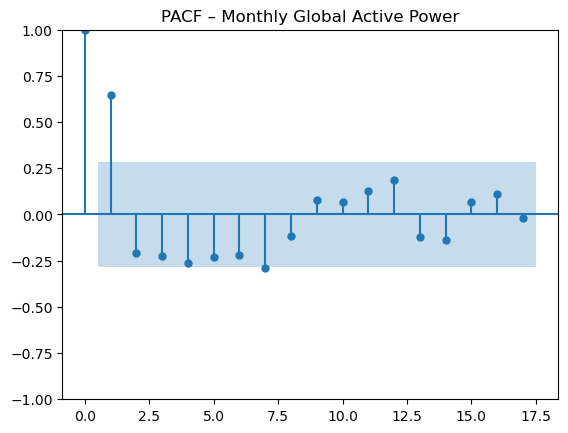

In [248]:
#monthly
series_for_lags_m = tsm

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_m, title="ACF – Monthly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_m, title="PACF – Monthly Global Active Power")
plt.show()

In [249]:
#build a df for an AR(p) model
def create_lag_features_from_list(series, lags):
    df = pd.DataFrame({'y': series})
    for lag in lags:
        df[f"lag_{lag}"] = df['y'].shift(lag)
    return df.dropna()

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#fit an AR(p) model by hand for a given series
def fit_ar_manual(series, lags, label, train_frac=0.8):
    df_lag = create_lag_features_from_list(series, lags)
    
    #split chronologically
    train_size = int(len(df_lag) * train_frac)
    train_data = df_lag.iloc[:train_size]
    test_data = df_lag.iloc[train_size:]
    
    y_train = train_data['y'].values
    y_test = test_data['y'].values
    
    X_train = train_data.drop(columns=['y']).values
    X_test = test_data.drop(columns=['y']).values
    
    #manual OLS: w = (X^T X)^(-1) X^T y
    XtX = X_train.T @ X_train
    XtY = X_train.T @ y_train
    w = np.linalg.inv(XtX) @ XtY
    
    #predictions
    y_pred_train = X_train @ w
    y_pred_test = X_test  @ w
    
    #errors
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"{label}")
    print("Lags:", lags)
    print("Coefficients:", w)
    print("Train - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%".format(mae_train, rmse_train, mape_train))
    print("Test - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_test, rmse_test, mape_test, r2_test), '\n')
    
    return {"w": w, "y_train": y_train, "y_test": y_test, "y_pred_train": y_pred_train, "y_pred_test": y_pred_test,}

In [252]:
lags_h = [1, 2, 3, 24, 48]
df_lagged_h = create_lag_features_from_list(tsh, lags_h).dropna()
print("Hourly Lagged DataFrame:")
print(df_lagged_h.head())
print("\n")

hourly_lag_sets = [[1], [1, 2], [1, 2, 3], [1, 2, 3, 24], [1, 2, 3, 24, 48],]
results_hourly = {}
for lags in hourly_lag_sets:
    key = f"lags_{lags}"
    results_hourly[key] = fit_ar_manual(tsh, lags, label=f"Hourly AR model with lags={lags}")

Hourly Lagged DataFrame:
                            y     lag_1     lag_2     lag_3    lag_24  \
Datetime                                                                
2006-12-18 17:00:00  2.154900  1.949300  1.784300  1.733033  3.406767   
2006-12-18 18:00:00  2.402533  2.154900  1.949300  1.784300  3.697100   
2006-12-18 19:00:00  2.614500  2.402533  2.154900  1.949300  2.908400   
2006-12-18 20:00:00  3.050567  2.614500  2.402533  2.154900  3.361500   
2006-12-18 21:00:00  2.169733  3.050567  2.614500  2.402533  3.040767   

                       lag_48  
Datetime                       
2006-12-18 17:00:00  4.222889  
2006-12-18 18:00:00  3.632200  
2006-12-18 19:00:00  3.400233  
2006-12-18 20:00:00  3.268567  
2006-12-18 21:00:00  3.056467  


Hourly AR model with lags=[1]
Lags: [1]
Coefficients: [0.88406709]
Train - MAE: 0.4383, RMSE: 0.6769, MAPE: 44.81%
Test - MAE: 0.3873, RMSE: 0.5856, MAPE: 41.80%, R²: 0.3802 

Hourly AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [

In [253]:
lags_d = [1, 2, 3, 4, 7]
df_lagged_d = create_lag_features_from_list(tsd, lags_d).dropna()
print("Daily Lagged DataFrame:")
print(df_lagged_d.head())
print("\n")

daily_lag_sets = [[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 7],]
results_daily = {}
for lags in daily_lag_sets:
    key = f"lags_{lags}"
    results_daily[key] = fit_ar_manual(tsd, lags, label=f"Daily AR model with lags={lags}")

Daily Lagged DataFrame:
                   y     lag_1     lag_2     lag_3     lag_4     lag_7
Datetime                                                              
2006-12-23  3.314851  1.625929  1.193758  1.545658  1.157079  3.053475
2006-12-24  1.770842  3.314851  1.625929  1.193758  1.545658  2.354486
2006-12-25  1.904944  1.770842  3.314851  1.625929  1.193758  1.530435
2006-12-26  2.732021  1.904944  1.770842  3.314851  1.625929  1.157079
2006-12-27  1.061639  2.732021  1.904944  1.770842  3.314851  1.545658


Daily AR model with lags=[1]
Lags: [1]
Coefficients: [0.94572327]
Train - MAE: 0.2844, RMSE: 0.3821, MAPE: 26.22%
Test - MAE: 0.2114, RMSE: 0.2949, MAPE: 20.72%, R²: 0.1202 

Daily AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [0.66153248 0.30037405]
Train - MAE: 0.2675, RMSE: 0.3642, MAPE: 25.13%
Test - MAE: 0.1901, RMSE: 0.2696, MAPE: 18.92%, R²: 0.2646 

Daily AR model with lags=[1, 2, 3]
Lags: [1, 2, 3]
Coefficients: [0.53499352 0.03813002 0.40372259]
Train - MA

In [255]:
lags_w = [1, 2, 3]
df_lagged_w = create_lag_features_from_list(tsw, lags_w).dropna()
print("Weekly Lagged DataFrame:")
print(df_lagged_w.head())
print("\n")

weekly_lag_sets = [[1], [1, 2], [1, 2, 3],]
results_weekly = {}
for lags in weekly_lag_sets:
    key = f"lags_{lags}"
    results_weekly[key] = fit_ar_manual(tsw, lags, label=f"Weekly AR model with lags={lags}")

Weekly Lagged DataFrame:
                   y     lag_1     lag_2     lag_3
Datetime                                          
2007-01-07  1.484233  1.958376  1.734186  2.505248
2007-01-14  1.604954  1.484233  1.958376  1.734186
2007-01-21  1.639451  1.604954  1.484233  1.958376
2007-01-28  1.517470  1.639451  1.604954  1.484233
2007-02-04  1.703608  1.517470  1.639451  1.604954


Weekly AR model with lags=[1]
Lags: [1]
Coefficients: [0.97095277]
Train - MAE: 0.1598, RMSE: 0.2333, MAPE: 16.34%
Test - MAE: 0.1483, RMSE: 0.1990, MAPE: 15.51%, R²: 0.3395 

Weekly AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [0.64433701 0.33799285]
Train - MAE: 0.1469, RMSE: 0.2123, MAPE: 16.26%
Test - MAE: 0.1405, RMSE: 0.1920, MAPE: 15.49%, R²: 0.3574 

Weekly AR model with lags=[1, 2, 3]
Lags: [1, 2, 3]
Coefficients: [0.61076913 0.28134117 0.09066931]
Train - MAE: 0.1471, RMSE: 0.2120, MAPE: 16.45%
Test - MAE: 0.1391, RMSE: 0.1890, MAPE: 15.44%, R²: 0.3776 



In [257]:
lags_m = [1, 2, 12]
df_lagged_m = create_lag_features_from_list(tsm, lags_m).dropna()
print("Monthly Lagged DataFrame:")
print(df_lagged_m.head())
print("\n")

monthly_lag_sets = [[1], [1, 2], [1, 2, 12],]
results_monthly = {}
for lags in monthly_lag_sets:
    key = f"lags_{lags}"
    results_monthly[key] = fit_ar_manual(tsm, lags, label=f"Monthly AR model with lags={lags}")

Monthly Lagged DataFrame:
                   y     lag_1     lag_2    lag_12
Datetime                                          
2007-12-31  1.626474  1.294473  1.103911  1.901295
2008-01-31  1.459920  1.626474  1.294473  1.546034
2008-02-29  1.181384  1.459920  1.626474  1.401084
2008-03-31  1.245337  1.181384  1.459920  1.318627
2008-04-30  1.115972  1.245337  1.181384  0.891189


Monthly AR model with lags=[1]
Lags: [1]
Coefficients: [0.96408384]
Train - MAE: 0.1784, RMSE: 0.2269, MAPE: 20.31%
Test - MAE: 0.1475, RMSE: 0.1819, MAPE: 15.69%, R²: 0.3051 

Monthly AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [ 1.05771085 -0.0818541 ]
Train - MAE: 0.1734, RMSE: 0.2237, MAPE: 20.23%
Test - MAE: 0.1438, RMSE: 0.1782, MAPE: 15.29%, R²: 0.3334 

Monthly AR model with lags=[1, 2, 12]
Lags: [1, 2, 12]
Coefficients: [ 0.30875678 -0.0263475   0.69098625]
Train - MAE: 0.1160, RMSE: 0.1550, MAPE: 15.87%
Test - MAE: 0.0713, RMSE: 0.0784, MAPE: 7.56%, R²: 0.8430 



In [258]:
#lags for plotting
key_h = "lags_[1, 2, 3, 24, 48]"
key_d = "lags_[1, 2, 3, 4, 7]"
key_w = "lags_[1, 2, 3]"
key_m = "lags_[1, 2, 12]"

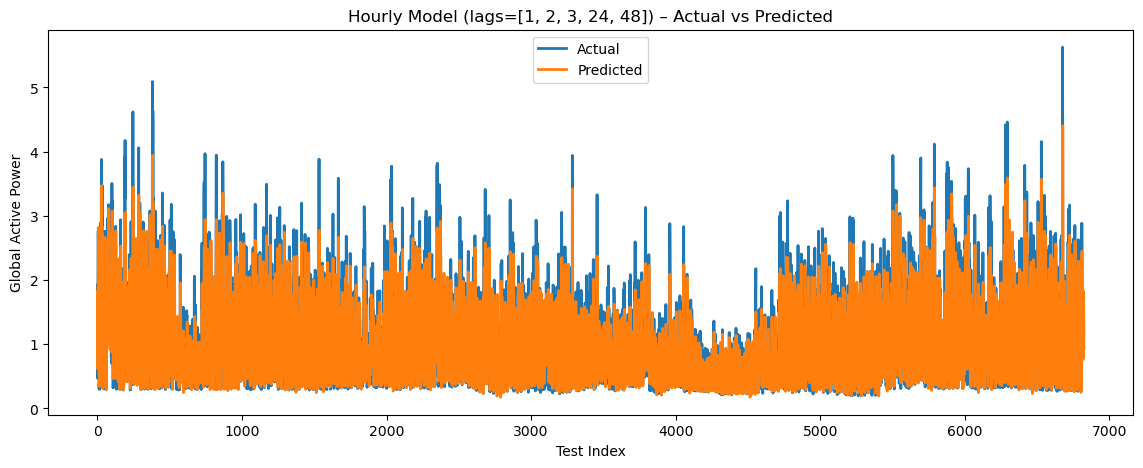

In [260]:
#hourly
y_test_h = results_hourly[key_h]["y_test"]
y_pred_test_h = results_hourly[key_h]["y_pred_test"]

plt.figure(figsize=(14,5))
plt.plot(y_test_h, label="Actual", linewidth=2)
plt.plot(y_pred_test_h, label="Predicted", linewidth=2)
plt.title(f"Hourly Model (lags={key_h[5:]}) – Actual vs Predicted")
plt.xlabel("Test Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

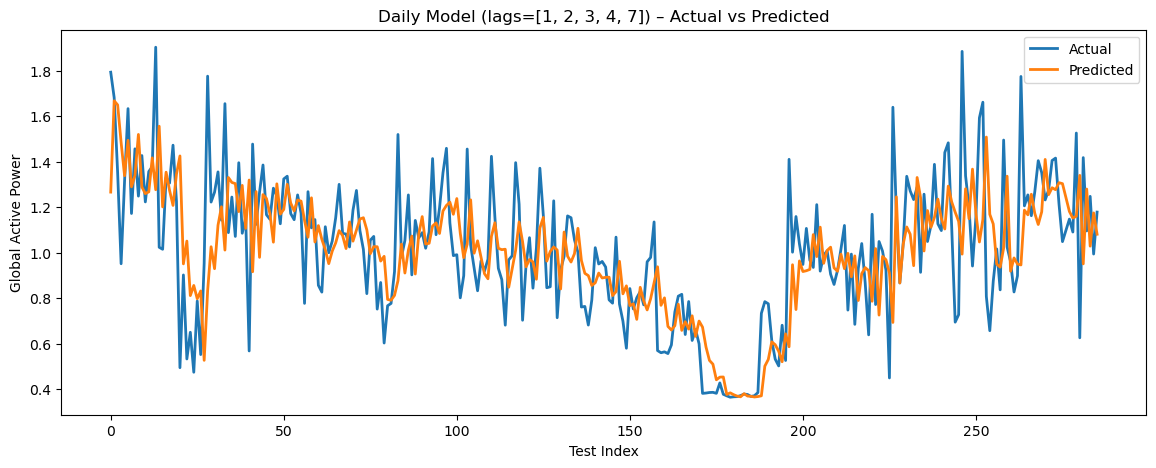

In [261]:
#daily
y_test_d = results_daily[key_d]["y_test"]
y_pred_test_d = results_daily[key_d]["y_pred_test"]

plt.figure(figsize=(14,5))
plt.plot(y_test_d, label="Actual", linewidth=2)
plt.plot(y_pred_test_d, label="Predicted", linewidth=2)
plt.title(f"Daily Model (lags={key_d[5:]}) – Actual vs Predicted")
plt.xlabel("Test Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

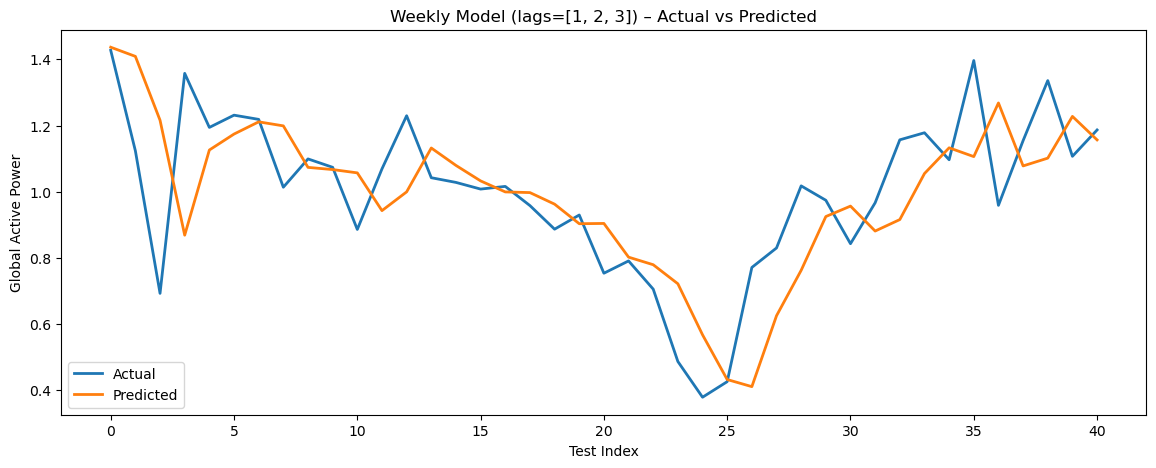

In [262]:
#weekly
y_test_w = results_weekly[key_w]["y_test"]
y_pred_test_w = results_weekly[key_w]["y_pred_test"]

plt.figure(figsize=(14,5))
plt.plot(y_test_w, label="Actual", linewidth=2)
plt.plot(y_pred_test_w, label="Predicted", linewidth=2)
plt.title(f"Weekly Model (lags={key_w[5:]}) – Actual vs Predicted")
plt.xlabel("Test Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

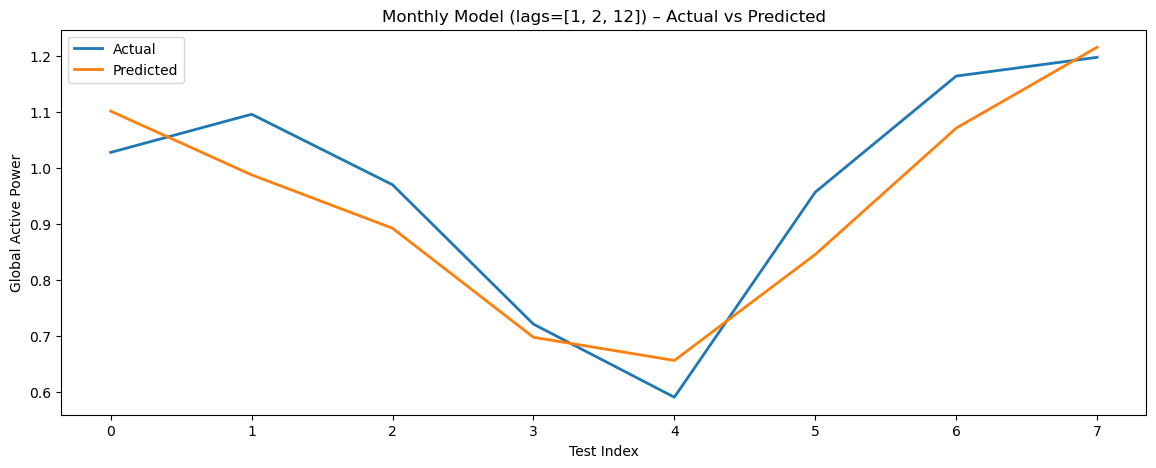

In [263]:
#monthly
y_test_m = results_monthly[key_m]["y_test"]
y_pred_test_m = results_monthly[key_m]["y_pred_test"]

plt.figure(figsize=(14,5))
plt.plot(y_test_m, label="Actual", linewidth=2)
plt.plot(y_pred_test_m, label="Predicted", linewidth=2)
plt.title(f"Monthly Model (lags={key_m[5:]}) – Actual vs Predicted")
plt.xlabel("Test Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()